## analysing the weights for our loss
Studying the range and values of weights computed using tf-idf for the positive weights and coocurances for negative weights 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [54]:
positive_weights = pd.read_csv("/home/karim/Documents/research/sourceCode/context_classification_cnn/GroundTruth/positive_weights.csv")
negative_weights = pd.read_csv("/home/karim/Documents/research/sourceCode/context_classification_cnn/GroundTruth/negative_weights.csv")

In [55]:
positive_weights_noID = positive_weights.iloc[:,1:]
negative_weights_noID = negative_weights.iloc[:,1:]

## Positive weights stats
it seems most positive weights have very low values, which is contrary to what we would want normally. We already have confidence about our weights and we just want to increase it 

In [56]:
# replacing 0s with NaNs to ignore them in our stats 
positive_weights_noID = positive_weights_noID[positive_weights_noID > 0]
positive_weights_noID.describe()

,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
count,20022.000000,31645.000000,17324.000000,28742.000000,20679.000000,17330.000000,20962.000000,28367.000000,18476.000000,19533.000000,17329.000000,17329.000000,23545.000000,21213.000000,17331.000000
mean,0.024322,0.019519,0.027465,0.021447,0.025219,0.016966,0.015846,0.024067,0.039386,0.023716,0.014950,0.025388,0.034624,0.019003,0.009770
std,0.022028,0.031228,0.045563,0.037218,0.031031,0.031075,0.024505,0.033382,0.061651,0.030034,0.028757,0.070625,0.040019,0.032677,0.029513
min,0.001510,0.000335,0.000909,0.000234,0.000949,0.001030,0.000932,0.000520,0.001305,0.001109,0.000268,0.000659,0.001344,0.000967,0.000320
25%,0.011486,0.005910,0.006860,0.003731,0.008648,0.006050,0.006900,0.008288,0.009570,0.008687,0.003330,0.005163,0.013267,0.007351,0.002435
50%,0.019130,0.010704,0.014475,0.009251,0.016807,0.010799,0.011500,0.015200,0.021103,0.016329,0.007814,0.012131,0.023695,0.012838,0.005017
75%,0.029819,0.021408,0.028171,0.023858,0.030226,0.018954,0.019786,0.027298,0.043246,0.028233,0.015628,0.020418,0.040816,0.021386,0.009352
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Values are way to low, a mean of 0.01!. We probably want all positive values to be around 1, with small variation giving more or less weight to some samples. Pure tf-idf values are not suitable.

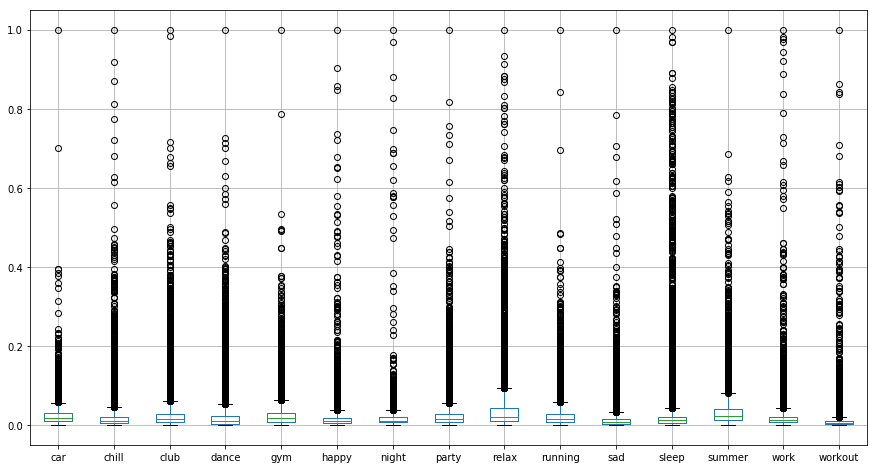

In [57]:
# Original weights with max normalization
positive_weights_noID.boxplot(figsize = (15,8))

### Looking into the highest tf-idf tracks

In [58]:
# checking the tracks with 1s, the hightest weights where do they come from? 
positive_weights[(positive_weights == 1).any(axis=1)]
# Check tf and idf seperately

,song_id,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
4736,2264760,0.000000,0.000000,0.000000,0.034232,0.000000,0.000000,0.000000,1.000000,0.000000,0.029448,0.0,0.000000,0.029748,0.012838,0.007088
5718,2776806,0.000000,0.000000,0.066947,1.000000,0.034948,0.011373,0.000000,0.245314,0.000000,0.069399,0.0,0.000000,0.000000,0.000000,0.003537
15042,16231091,0.000000,0.012845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.0,0.012623,0.000000,1.000000,0.000000
16482,25479151,0.000000,0.005936,0.000000,0.004149,1.000000,0.000000,0.000000,0.000000,0.000000,0.058896,0.0,0.000000,0.000000,0.149774,0.286368
24750,77192191,0.000000,0.256893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.033661,0.000000,0.024691,0.000000
25288,78508323,0.000000,0.000000,0.201544,0.304583,0.023060,0.037520,0.101890,0.167557,0.000000,0.148150,0.0,0.000000,1.000000,0.000000,0.000000
28397,91889740,0.000000,0.092527,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.090044,0.000000,0.0,0.000000,0.028534,0.020523,0.000000
32780,116348608,1.000000,0.013134,0.000000,0.006426,0.000000,0.020168,0.009128,0.032627,0.012782,0.013031,0.0,0.000000,0.034226,0.022723,0.000000
34497,126237105,0.000000,0.000000,0.000000,0.000000,0.200011,0.000000,0.000000,0.000000,0.000000,0.169914,0.0,0.000000,0.000000,0.438272,1.000000
35286,130425888,0.000000,0.000000,0.000000,0.000000,0.022140,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.009960


In [59]:
# Read the track counts to check the tracks with high tf-idf how are they like
track_count = pd.read_csv("/home/karim/Documents/BalancedDatasetDeezer/GroundTruth/balanced_ground_truth_track_count.csv")

### Checking playlists for "work" highest tf-idf

In [64]:
# Work top tf-idf
track_count[track_count.song_id == 16231091]
# So many in one category! and none of the others! Need to check the playlists

,song_id,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
15042,16231091,0,6,0,0,0,0,0,0,12,0,0,3,0,162,0


In [65]:
playlists = pd.read_csv("/home/karim/Documents/BalancedDatasetDeezer/RawData/sample_playlists_title.tsv",delimiter = '\t')
playlists_tracks = pd.read_csv("/home/karim/Documents/BalancedDatasetDeezer/RawData/playlists_songs.tsv",delimiter = '\t')

In [70]:
work_top_tfidf = playlists_tracks[playlists_tracks.song_id == 16231091]
playlists[playlists.playlist_id.isin(work_top_tfidf.playlist_id)]

,playlist_id,editor,title,matches
1391,3095565602,0,Sunday morning,morning
2131,4312145682,0,work,work
3111,5992764724,0,work,work
3122,6012642884,0,focus at work,work
5735,5042007664,0,Focus at work,work
5850,5257435982,0,focus work,work
6231,5980291724,0,Focus at work,work
9039,5199176908,0,focus at the work,work
15749,6012643124,0,focus at work,work
18518,5237747746,0,focus and work para trabajar,work


# We need to better normalize the positive weights!

In [61]:
# Loading original without normalization
positive_weights_noNormalization = pd.read_csv("/home/karim/Documents/research/sourceCode/context_classification_cnn/GroundTruth/positive_weights_noNormalization.csv")
positive_weights_noNormalization = positive_weights_noNormalization.iloc[:,1:]

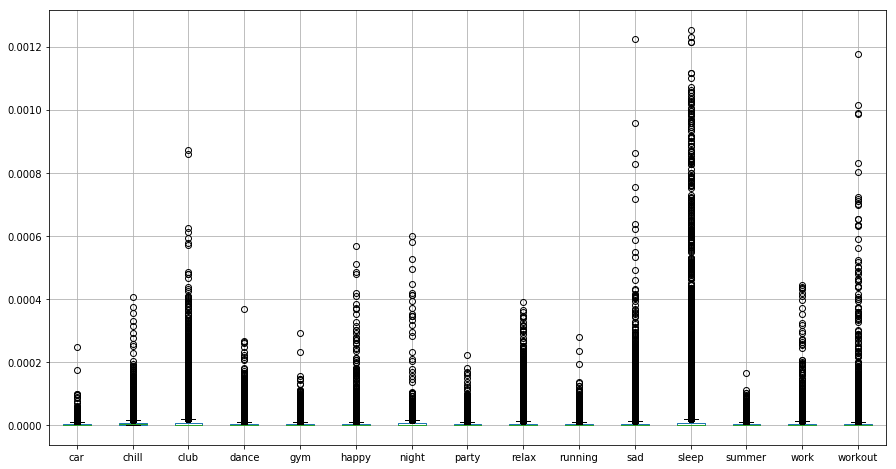

In [62]:
# Original weights without normalization
positive_weights_noNormalization.boxplot(figsize = (15,8))

## Normalization with zero mean + unit variance + adding one + clip at 2 (unit mean unit var)
Note I compute the mean and variance only on the positive samples, then clip at 2 [cause max values are around 50!], hence final results is no longer unit variance or mean, but still pretty normalized 

In [87]:
# Loading unit mean unit var weights
positive_weights_unitMean_unitvar = pd.read_csv("/home/karim/Documents/research/sourceCode/context_classification_cnn/GroundTruth/positive_weights_MeanOne_unitVar_clip2.csv")
positive_weights_unitMean_unitvar_noID = positive_weights_unitMean_unitvar.iloc[:,1:]

In [88]:
# replacing 0s with NaNs to ignore them in our stats 
positive_weights_unitMean_unitvar_noID = positive_weights_unitMean_unitvar_noID[positive_weights_unitMean_unitvar_noID > 0]
positive_weights_unitMean_unitvar_noID.describe()

,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
count,19980.000000,31645.000000,17324.000000,28742.000000,20679.000000,17330.000000,20962.000000,28367.000000,18476.000000,19533.000000,17329.000000,17329.000000,23545.000000,21213.000000,17331.000000
mean,0.897961,0.891511,0.873298,0.877866,0.883407,0.921104,0.940447,0.884750,0.876397,0.888961,0.898312,0.886209,0.875211,0.925342,0.928710
std,0.574927,0.450875,0.442283,0.474262,0.525434,0.376062,0.414148,0.476270,0.475491,0.493443,0.417044,0.288230,0.524387,0.382297,0.277145
min,0.010088,0.385694,0.417160,0.430042,0.217897,0.487164,0.391374,0.294613,0.382309,0.247298,0.489413,0.649854,0.168407,0.448030,0.679813
25%,0.421466,0.564221,0.547778,0.523999,0.465985,0.648737,0.634918,0.527298,0.516364,0.499628,0.595900,0.713629,0.466351,0.643422,0.751483
50%,0.782828,0.717719,0.714912,0.672320,0.728921,0.801550,0.822635,0.734371,0.703437,0.754065,0.751837,0.812289,0.726905,0.811321,0.838955
75%,1.249529,1.060478,1.015493,1.064798,1.161379,1.063995,1.160773,1.096763,1.062601,1.150423,1.023564,0.929633,1.154742,1.072918,0.985848
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


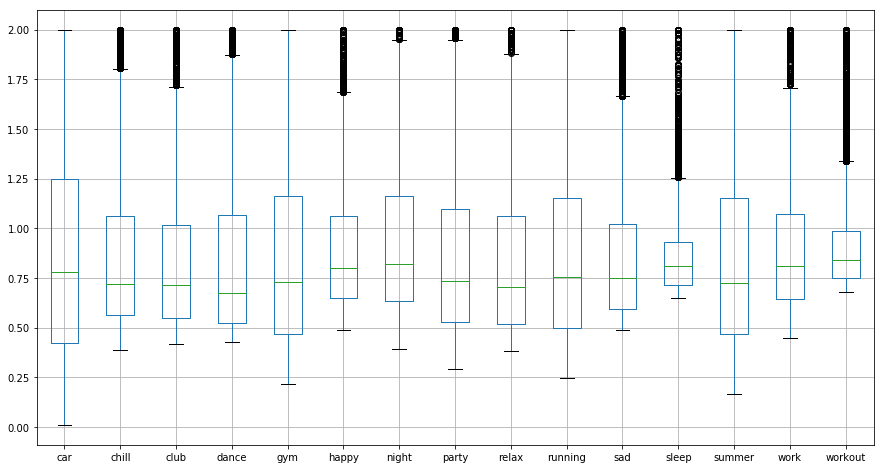

In [89]:
# unit mean unit var weights
positive_weights_unitMean_unitvar_noID.boxplot(figsize = (15,8))

## Negative weights stats 

In [30]:
# replacing 0s with NaNs to ignore them in our stats 
negative_weights_noID = negative_weights_noID[negative_weights_noID > 0]
negative_weights_noID.describe()

,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
count,27237.000000,15614.000000,29929.000000,18520.000000,26579.000000,29929.000000,26296.000000,18890.000000,28784.000000,27726.000000,29929.000000,29929.000000,23713.000000,26046.000000,29929.000000
mean,0.819712,0.635873,0.862395,0.770031,0.822136,0.852645,0.774082,0.774038,0.787485,0.822259,0.842124,0.854069,0.764238,0.794051,0.862062
std,0.216537,0.230787,0.237940,0.256882,0.226395,0.216663,0.234696,0.238098,0.234874,0.231244,0.234676,0.222545,0.232281,0.225493,0.229472
min,0.001869,0.002081,0.020833,0.001869,0.004975,0.018743,0.004845,0.005187,0.014388,0.004975,0.037037,0.032258,0.001869,0.003731,0.034483
25%,0.740741,0.500000,0.833333,0.663717,0.729167,0.794118,0.655527,0.608820,0.644172,0.736842,0.756098,0.788927,0.648148,0.666667,0.835938
50%,0.913907,0.666667,0.995633,0.888889,0.925926,0.958763,0.859247,0.866667,0.860000,0.938217,0.962877,0.982301,0.847345,0.894378,0.984259
75%,0.966921,0.838791,1.000000,0.965517,0.986014,0.993789,0.969072,0.962834,0.998538,0.989899,1.000000,1.000000,0.951220,0.967422,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


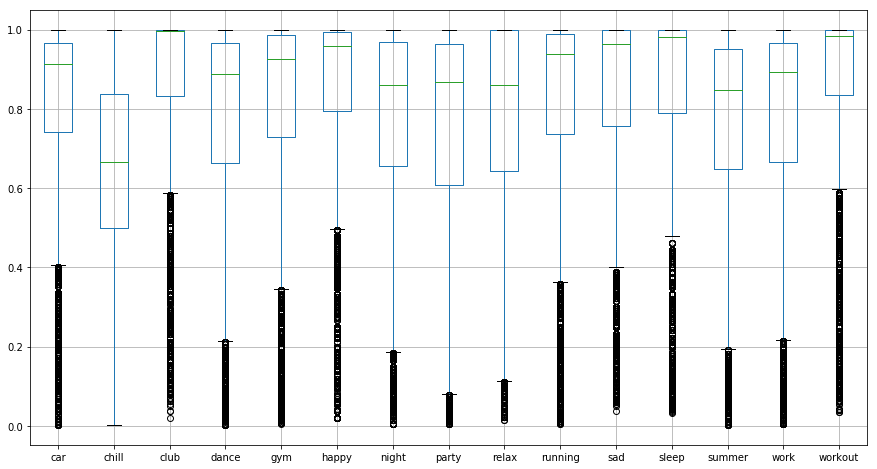

In [31]:
negative_weights_noID.boxplot(figsize = (15,8))

Negative weights seem to make more sense, for most of the negative labels we have high confidence, and for certain samples we have very low confidence. 
Also, the fact that "Chill" has lower confidence makes sense since chill is almost always labeled with everything. So We don't have cofidence in its negative labels (probably just missing). 

However, question is, what do we do with such classes were everything is just labelled with them. It is not a good label to work with, kind of useless. 

,song_id,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
count,4.992900e+04,49929.000000,49929.000000,49929.000000,49929.000000,49929.000000,49929.000000,49929.000000,49929.000000,49929.000000,49929.000000,49929.000000,49929.000000,49929.000000,49929.000000,49929.000000
mean,1.507437e+08,0.881165,0.894412,0.891552,0.881965,0.881815,0.927178,0.931793,0.889233,0.886782,0.890211,0.907745,0.918841,0.878343,0.927527,0.945098
std,1.844503e+08,0.576779,0.445970,0.383447,0.435244,0.490878,0.383953,0.451733,0.476767,0.412861,0.476101,0.362051,0.247647,0.512334,0.408193,0.266243
min,2.040740e+05,0.468431,0.534574,0.680783,0.590671,0.555891,0.705707,0.624118,0.508890,0.653383,0.579511,0.717618,0.796625,0.497070,0.653166,0.811586
25%,1.230583e+07,0.468431,0.534574,0.680783,0.590671,0.555891,0.705707,0.624118,0.508890,0.653383,0.579511,0.717618,0.796625,0.497070,0.653166,0.811586
50%,7.783466e+07,0.468431,0.726092,0.680783,0.666765,0.555891,0.705707,0.624118,0.691990,0.653383,0.579511,0.717618,0.796625,0.497070,0.653166,0.811586
75%,1.408695e+08,1.281000,1.070823,0.954568,0.984319,1.109284,1.014411,1.170167,1.108655,0.936142,1.134556,0.933237,0.935185,1.156256,1.111875,0.971497
max,6.952235e+08,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
